In [19]:
# Se importan todas las librerías necesarías para el análisis. Cargamos el archivo y mostramos los primeros registros
# con su respectiva cabecera como nombre de columna.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

file_path = 'C:/UNI/Cursos_2024/Haaktoon/raw_data/2023_accidents_causa_conductor_gu_bcn_.csv'
df = pd.read_csv(file_path)

df.head()


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_mediata,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84
0,2023S000699,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Dissabte,2023,2,Febrer,4,16,Tarda,Manca d'atenció a la conducció,430443.36,4585232.00,2.166596,41.413783
1,2023S005197,-1,Desconegut,-1,Desconegut,-1,Estatut de Catalunya ...,11,Divendres,2023,9,Setembre,1,13,Matí,No respectar distàncies,429493.73,4587108.15,2.155015,41.430598
2,2023S007430,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Divendres,2023,12,Desembre,15,11,Matí,No respectar distàncies,430443.36,4585232.00,2.166596,41.413783
3,2023S000961,-1,Desconegut,-1,Desconegut,-1,Amílcar ...,120,Dissabte,2023,1,Gener,28,14,Tarda,No respectat pas de vianants,430955.45,4586335.10,2.172596,41.423762
4,2023S006486,-1,Desconegut,-1,Desconegut,-1,Augusta / Hort de la Vila ...,NaN,Dijous,2023,11,Novembre,2,14,Tarda,Desobeir semàfor,426883.33,4583690.92,2.124189,41.399587


In [24]:
# Se indica la cantidad de filas y columnas. Además nos mostrará el listado de las columnas
# que conforman la base de datos.

print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (8897, 20)
Nombre columnas: Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ',
       'Descripcio_dia_setmana', 'NK_Any', 'Mes_any', 'Nom_mes', 'Dia_mes',
       'Hora_dia', 'Descripcio_torn', 'Descripcio_causa_mediata',
       'Coordenada_UTM_X_ED50', 'Coordenada_UTM_Y_ED50', 'Longitud_WGS84',
       'Latitud_WGS84'],
      dtype='object')


In [5]:
# Se muestra información detallada de la base de datos:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8897 entries, 0 to 8896
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Numero_expedient          8897 non-null   object 
 1   Codi_districte            8897 non-null   int64  
 2   Nom_districte             8897 non-null   object 
 3   Codi_barri                8897 non-null   int64  
 4   Nom_barri                 8897 non-null   object 
 5   Codi_carrer               8897 non-null   int64  
 6   Nom_carrer                8897 non-null   object 
 7   Num_postal                8893 non-null   object 
 8   Descripcio_dia_setmana    8897 non-null   object 
 9   NK_Any                    8897 non-null   int64  
 10  Mes_any                   8897 non-null   int64  
 11  Nom_mes                   8897 non-null   object 
 12  Dia_mes                   8897 non-null   int64  
 13  Hora_dia                  8897 non-null   int64  
 14  Descripc

In [6]:
# Se muestran la cantidad de valores nulos por campo:

print(df.isnull().sum())

Numero_expedient            0
Codi_districte              0
Nom_districte               0
Codi_barri                  0
Nom_barri                   0
Codi_carrer                 0
Nom_carrer                  0
Num_postal                  4
Descripcio_dia_setmana      0
NK_Any                      0
Mes_any                     0
Nom_mes                     0
Dia_mes                     0
Hora_dia                    0
Descripcio_torn             0
Descripcio_causa_mediata    0
Coordenada_UTM_X_ED50       0
Coordenada_UTM_Y_ED50       0
Longitud_WGS84              0
Latitud_WGS84               0
dtype: int64


In [7]:
# Se describen las principales estadísticas para cada campo de la base de datos:

df.describe()

,Codi_districte,Codi_barri,Codi_carrer,NK_Any,Mes_any,Dia_mes,Hora_dia,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84
count,8897.000000,8897.000000,8897.000000,8897.0,8897.000000,8897.000000,8897.000000,8897.000000,8.897000e+03,8897.000000,8897.000000
mean,4.850961,27.265932,254856.702709,2023.0,6.507812,15.778802,13.793638,430087.851361,4.583704e+06,2.162522,41.399987
std,3.037727,22.117159,204941.792988,0.0,3.381833,8.811543,5.415982,2044.759091,2.489506e+03,0.024341,0.022496
min,-1.000000,-1.000000,-1.000000,2023.0,1.000000,1.000000,0.000000,421374.020000,4.575152e+06,2.058047,41.322721
25%,2.000000,8.000000,120603.000000,2023.0,4.000000,8.000000,10.000000,428577.560000,4.582111e+06,2.144581,41.385618
50%,4.000000,20.000000,196707.000000,2023.0,6.000000,16.000000,14.000000,430136.230000,4.583399e+06,2.163143,41.397285
75%,7.000000,43.000000,325107.000000,2023.0,10.000000,23.000000,18.000000,431574.840000,4.585169e+06,2.180201,41.413127
max,10.000000,73.000000,701873.000000,2023.0,12.000000,31.000000,23.000000,435085.590000,4.591182e+06,2.222171,41.467466


In [11]:
df.dropna()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_mediata,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84
0,2023S000699,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Dissabte,2023,2,Febrer,4,16,Tarda,Manca d'atenció a la conducció,430443.36,4585232.00,2.166596,41.413783
1,2023S005197,-1,Desconegut,-1,Desconegut,-1,Estatut de Catalunya ...,11,Divendres,2023,9,Setembre,1,13,Matí,No respectar distàncies,429493.73,4587108.15,2.155015,41.430598
2,2023S007430,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Divendres,2023,12,Desembre,15,11,Matí,No respectar distàncies,430443.36,4585232.00,2.166596,41.413783
3,2023S000961,-1,Desconegut,-1,Desconegut,-1,Amílcar ...,120,Dissabte,2023,1,Gener,28,14,Tarda,No respectat pas de vianants,430955.45,4586335.10,2.172596,41.423762
5,2023S002721,-1,Desconegut,-1,Desconegut,-1,Lisboa ...,68-72,Dilluns,2023,5,Maig,8,1,Nit,Manca d'atenció a la conducció,429524.58,4586879.70,2.155411,41.428543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8892,2023S000678,8,Nou Barris,44,Vilapicina i la Torre Llobeta,119003,Fabra i Puig,0181 0181,Divendres,2023,2,Febrer,3,17,Tarda,Avançament defectuós/improcedent,431379.36,4587039.88,2.177589,41.430147
8893,2023S006888,8,Nou Barris,44,Vilapicina i la Torre Llobeta,45701,Quinze,0068 0068,Dilluns,2023,11,Novembre,20,14,Tarda,No respectar distàncies,431122.09,4586910.29,2.174525,41.428957
8894,2023S007283,8,Nou Barris,45,Porta,256401,Pintor Alsamora,0001 0001,Divendres,2023,12,Desembre,8,6,Matí,Altres,431890.58,4587477.65,2.183657,41.434133
8895,2023S007283,8,Nou Barris,45,Porta,256401,Pintor Alsamora,0001 0001,Divendres,2023,12,Desembre,8,6,Matí,Manca d'atenció a la conducció,431890.58,4587477.65,2.183657,41.434133


In [20]:
df.dropna()
print(df.isnull().sum())

Numero_expedient            0
Codi_districte              0
Nom_districte               0
Codi_barri                  0
Nom_barri                   0
Codi_carrer                 0
Nom_carrer                  0
Num_postal                  4
Descripcio_dia_setmana      0
NK_Any                      0
Mes_any                     0
Nom_mes                     0
Dia_mes                     0
Hora_dia                    0
Descripcio_torn             0
Descripcio_causa_mediata    0
Coordenada_UTM_X_ED50       0
Coordenada_UTM_Y_ED50       0
Longitud_WGS84              0
Latitud_WGS84               0
dtype: int64


array([[<Axes: title={'center': 'Codi_districte'}>,
        <Axes: title={'center': 'Codi_barri'}>,
        <Axes: title={'center': 'Codi_carrer'}>],
       [<Axes: title={'center': 'NK_Any'}>,
        <Axes: title={'center': 'Mes_any'}>,
        <Axes: title={'center': 'Dia_mes'}>],
       [<Axes: title={'center': 'Hora_dia'}>,
        <Axes: title={'center': 'Coordenada_UTM_X_ED50'}>,
        <Axes: title={'center': 'Coordenada_UTM_Y_ED50'}>],
       [<Axes: title={'center': 'Longitud_WGS84'}>,
        <Axes: title={'center': 'Latitud_WGS84'}>, <Axes: >]],
      dtype=object)

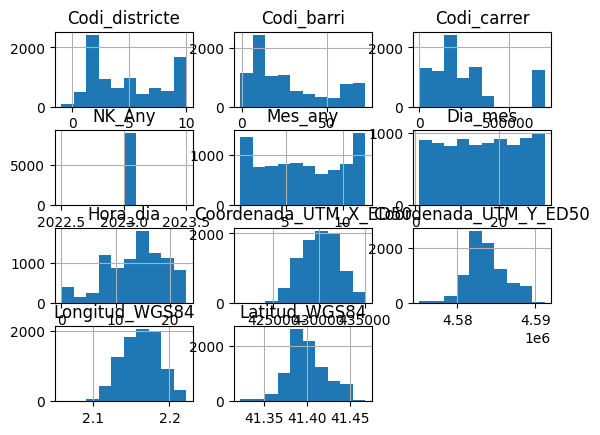

In [17]:
# Se muestra el histograma para cada campo de la base de datos:

df.hist()